# Assignment 34 - Mar 10' 23 - Statistics Advance 3

### Q1: What is Estimation Statistics? Explain point estimate and interval estimate.

#### Estimation statistics
* Estimation statistics is a branch of statistics that deals with estimating or inferring population parameters based on sample data. 
* In other words, it involves using statistical methods to estimate the values of parameters that describe a population from a sample of that population.

* There are two main types of estimation in statistics:
> 1. *Point estimation*
> 2. *Interval estimation*

#### Point Estimation: 
* Point estimation involves estimating a population parameter by a single value, which is called a point estimate. 
* A point estimate is usually the sample statistic, such as the sample mean, sample proportion, or sample standard deviation. 
* For example, if you want to estimate the average height of all people in a city, you can take a sample of people and calculate the mean height of that sample. This mean height is a point estimate of the population mean height.

#### Interval Estimation: 
* Interval estimation involves estimating a population parameter by a range of values, which is called an interval estimate. 
* The range of values is called a confidence interval, and it provides a measure of the precision or uncertainty of the estimate. 
* The confidence interval is usually computed by using a sample statistic and a margin of error. 
* For example, if you want to estimate the average height of all people in a city, you can take a sample of people and calculate the mean height of that sample, along with a margin of error. The confidence interval for the population mean height is the range of values that includes the point estimate (sample mean) and the margin of error.


#### Summary
Point estimation involves estimating a population parameter by a single value, while interval estimation involves estimating a population parameter by a range of values that provides a measure of the precision or uncertainty of the estimate.

![Point vs Interval Estimate](https://www.six-sigma-material.com/images/PointEstimate.png)

### Q2. Write a Python function to estimate the population mean using a sample mean and standard deviation.

In [1]:
import math
import scipy.stats as stats

def population_mean(sample, confidence_level = 0.95):
    
    # calculate the sample mean and standard deviation
    sample_mean = sum(sample) / len(sample)
    sample_var = sum([(x - sample_mean)**2 for x in sample]) / (len(sample) - 1)
    sample_std_dev = math.sqrt(sample_var)
    
    # calculate the t-value for the desired level of confidence and degrees of freedom
    alpha = 1 - confidence_level
    dof = len(sample) - 1
    t_value = stats.t.ppf(1 - alpha/2, dof)
    
    # calculate the standard error and margin of error
    std_error = sample_std_dev / math.sqrt(len(sample))
    margin_of_error = t_value * std_error
    
    # calculate the confidence interval bounds
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error
    
    # return the confidence interval as a tuple
    return(lower_bound, upper_bound)

In [2]:
import numpy as np
import random

# Set random seed for reproducibility
np.random.seed(0)

# Create a population of 1000 random values between 0 and 100
population_size = 1000
population = np.random.uniform(low=0, high=100, size=population_size)

# Take a random sample of 100 values from the population
sample_size = 100
sample = random.sample(list(population), sample_size)

# Estimate the population mean and interval using the sample data
lower_bound, upper_bound = population_mean(sample)

# Print the estimated mean
print(f"ESTIMATED population mean point estimate is : {np.mean(sample)}")
print(f"ESTIMATED population mean with 95% confidence interval : ({lower_bound},{upper_bound})")
print('\n==========================================================================================================\n')
# Printing Actual population mean 
print(f"ACTUAL Population mean is : {np.mean(population)}")

ESTIMATED population mean point estimate is : 50.326745074335804
ESTIMATED population mean with 95% confidence interval : (44.25548243080407,56.39800771786749)


ACTUAL Population mean is : 49.592153437178276


### Q3: What is Hypothesis testing? Why is it used? State the importance of Hypothesis testing

* Hypothesis testing is a statistical method used to determine whether a hypothesis about a population parameter is supported by the evidence provided by a sample of data. The process involves making a statistical inference about a population parameter, such as a mean or a proportion, based on sample data.

* In hypothesis testing, a null hypothesis is initially assumed to be true, and then evidence is gathered and analyzed to determine whether the null hypothesis can be rejected in favor of an alternative hypothesis. The null hypothesis represents the status quo or the default assumption, while the alternative hypothesis represents the proposed change or difference.

* Hypothesis testing is used in many fields, including science, engineering, business, and social sciences, to draw conclusions about the population based on sample data. For example, a pharmaceutical company may use hypothesis testing to determine whether a new drug is more effective than an existing drug. A marketing team may use hypothesis testing to determine whether a new advertising campaign is more effective than the current one.

* The importance of hypothesis testing lies in its ability to make statistical inferences about a population based on sample data, while accounting for the uncertainty and variability of the data. It provides a systematic and objective way to test a hypothesis and draw conclusions based on the evidence. Hypothesis testing allows us to make informed decisions based on data, rather than relying on intuition or guesswork. It is a critical tool in scientific research, where the validity and reliability of the results depend on the appropriate use of hypothesis testing.

![Hypothesis Testing](https://i.ytimg.com/vi/DlwOTOydeyk/maxresdefault.jpg)

### Q4. Create a hypothesis that states whether the average weight of male college students is greater than the average weight of female college students.

* **Null hypothesis**: The average weight of male college students is equal to or less than the average weight of female college students.


* **Alternative hypothesis**: The average weight of male college students is greater than the average weight of female college students.


* In statistical notation, this can be represented as:

    * H0: μm ≤ μf
    * Ha: μm > μf

        where:
        
            1. H0 = null hypothesis
            2. Ha = alternative hypothesis
            3. μm = population mean weight of male college students
            4. μf = population mean weight of female college students

### Q5. Write a Python script to conduct a hypothesis test on the difference between two population means, given a sample from each population.

In [1]:
import numpy as np
from scipy.stats import t

# Sample data
sample1 = np.array([2.5, 3.2, 2.9, 3.8, 3.5])
sample2 = np.array([2.1, 3.0, 3.5, 2.8, 3.2])

# Sample statistics
n1 = len(sample1)
n2 = len(sample2)
mean1 = np.mean(sample1)
mean2 = np.mean(sample2)
std1 = np.std(sample1, ddof=1)
std2 = np.std(sample2, ddof=1)

# Null and alternative hypotheses
null_hypothesis = "The population means of the two samples are EQUAL"
alt_hypothesis = "The population mean of sample 1 and sample 2 are NOT Equal"

# Calculate the t-statistic and degrees of freedom
sp = np.sqrt(((n1-1)*(std1**2) + (n2-1)*(std2**2)) / (n1+n2-2))
t_stat = (mean1 - mean2) / (sp * np.sqrt(1/n1 + 1/n2))
df = n1 + n2 - 2

# Calculate the p-value and critical value
p_value = 1 - t.cdf(t_stat, df=df)
alpha = 0.05
t_crit = t.ppf(1-alpha/2, df=df)

# Print p_value
print(f'p-value : {p_value}')

# Print t_stat
print(f't-statistic : {t_stat}')

#print t_crit
print(f't-crit : {t_crit}')

# Compare the p-value and critical value to the significance level
if p_value < alpha:
    print("Reject the null hypothesis: " + null_hypothesis)
    print("Accept the alternative hypothesis: " + alt_hypothesis)
else:
    print("Fail to reject the null hypothesis: " + null_hypothesis)
    
# Compare the t-statistic to the critical value
if abs(t_stat) > t_crit:
    print("Reject the null hypothesis: " + null_hypothesis)
    print("Accept the alternative hypothesis: " + alt_hypothesis)
else:
    print("Fail to reject the null hypothesis: " + null_hypothesis)

p-value : 0.22461584380277022
t-statistic : 0.7955870797707367
t-crit : 2.3060041350333704
Fail to reject the null hypothesis: The population means of the two samples are EQUAL
Fail to reject the null hypothesis: The population means of the two samples are EQUAL


### Q6: What is a null and alternative hypothesis? Give some examples.

* In statistical hypothesis testing, the null hypothesis (denoted as H0) is a statement that assumes there is no significant difference between two or more variables, or that a proposed relationship does not exist between variables. 
* The alternative hypothesis (denoted as Ha or H1) is a statement that contradicts the null hypothesis and claims that there is a significant difference between variables or a proposed relationship does exist.
* Examples of null and alternative hypotheses are:

    1. **Null Hypothesis**: The average age of customers who buy product A and product B is the same. **Alternative Hypothesis**: The average age of customers who buy product A is different from the average age of customers who buy product B.

    2. **Null Hypothesis**: The new drug has no effect on blood pressure. **Alternative Hypothesis**: The new drug reduces blood pressure.

    3. **Null Hypothesis**: There is no relationship between education level and job satisfaction. **Alternative Hypothesis**: Higher education levels are associated with higher job satisfaction.

    4. **Null Hypothesis**: The mean weight of male and female students is the same. **Alternative Hypothesis**: The mean weight of male students is greater than the mean weight of female students.

    5. **Null Hypothesis**: The proportion of voters who support Candidate A is the same as the proportion who support Candidate B. **Alternative Hypothesis**: The proportion of voters who support Candidate A is different from the proportion who support Candidate B.

### Q7: Write down the steps involved in hypothesis testing.

The general steps involved in hypothesis testing are:

1. State the null and alternative hypotheses: This involves defining the null hypothesis (H0) and alternative hypothesis (Ha) based on the research question or problem being investigated.

2. Determine the level of significance: This involves selecting a level of significance (alpha) that represents the maximum probability of making a Type I error (rejecting the null hypothesis when it is actually true).

3. Choose the appropriate test statistic: This depends on the type of data being analyzed, the sample size, and the assumptions of the statistical test.

4. Calculate the test statistic: This involves computing the test statistic based on the sample data.

5. Determine the p-value: This is the probability of obtaining a test statistic as extreme or more extreme than the observed value, assuming the null hypothesis is true.

6. Compare the p-value to the level of significance: If the p-value is less than or equal to the level of significance, reject the null hypothesis. If the p-value is greater than the level of significance, fail to reject the null hypothesis.

7. Interpret the results: This involves drawing conclusions based on the statistical analysis and determining the practical significance of the findings.

8. Make a decision and draw conclusions: Based on the results of the hypothesis test, make a decision regarding the research question and draw conclusions based on the findings.

![Hypothesis Testing Steps](https://www.odinschool.com/hs-fs/hubfs/1-2.png?width=642&name=1-2.png)

### Q8. Define p-value and explain its significance in hypothesis testing.

* In hypothesis testing, the p-value is the probability of obtaining a test statistic as extreme or more extreme than the observed value, assuming the null hypothesis is true. The p-value is a measure of the strength of the evidence against the null hypothesis.
* If the **p-value is less than or equal to the level of significance (alpha)**, it is considered **statistically significant**, and the **null hypothesis is rejected**. This indicates that the observed result is unlikely to have occurred by chance and supports the alternative hypothesis. If the p-value is greater than the level of significance, the null hypothesis cannot be rejected, and the result is not considered statistically significant.
* The p-value is significant because it provides a quantitative measure of the strength of the evidence against the null hypothesis. A **small p-value indicates strong evidence against the null hypothesis, whereas a large p-value indicates weak evidence against the null hypothesis**. 
* The p-value also helps researchers make informed decisions about whether to reject or fail to reject the null hypothesis and draw conclusions based on the statistical analysis.

![p-value significance](https://desktop.arcgis.com/en/arcmap/latest/tools/spatial-statistics-toolbox/GUID-CBF63B74-D1B2-44FC-A316-7AC2B1C1D464-web.png)

### Q9. Generate a Student's t-distribution plot using Python's matplotlib library, with the degrees of freedom parameter set to 10. 

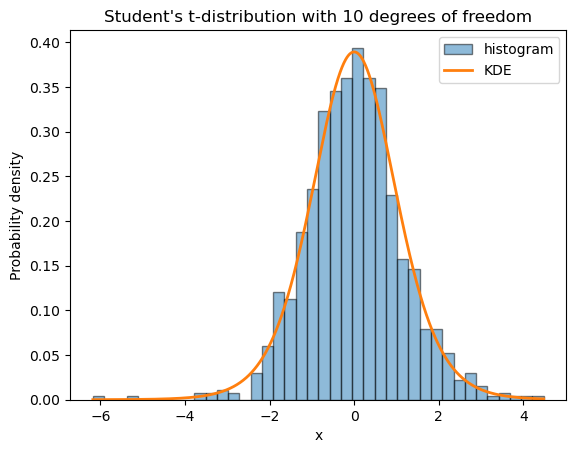

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t

df = 10 # degrees of freedom
data = t.rvs(df, size=1000) # generate 1000 random values from the t-distribution with 10 degrees of freedom

fig, ax = plt.subplots()
ax.hist(data, bins='fd', density=True, alpha=0.5,edgecolor='black',label='histogram')

kde_xs = np.linspace(data.min(), data.max(), 1000)
kde = t.pdf(kde_xs, df)
ax.plot(kde_xs, kde, label='KDE', linewidth=2)

ax.set_xlabel('x')
ax.set_ylabel('Probability density')
ax.set_title('Student\'s t-distribution with 10 degrees of freedom')
ax.legend(loc='best')
plt.show()

### Q10. Write a Python program to calculate the two-sample t-test for independent samples, given two random samples of equal size and a null hypothesis that the population means are equal.

In [10]:
import numpy as np
from scipy.stats import ttest_ind

# Generate two random samples of equal size
sample1 = np.random.normal(loc=10, scale=2, size=50)
sample2 = np.random.normal(loc=12, scale=2, size=50)

# Calculate the t-statistic and p-value using the ttest_ind function
t_stat, p_val = ttest_ind(sample1, sample2)

# Print the results
print("t-statistic = ", t_stat)
print("p-value = ", p_val)

alpha = 0.01
print("Confidence Interval =",1-alpha)
print('\n')

# Test the null hypothesis
if p_val < alpha:
    print("REJECT the null hypothesis that the population means are equal.")
    print("Conclusion : Population means for both samples are DIFFERENT")
else:
    print("FAIL to reject the null hypothesis that the population means are equal.")
    print("Conclusion : Population means for both samples are EQUAL")

t-statistic =  -4.259525190399922
p-value =  4.706722186264865e-05
Confidence Interval = 0.99


REJECT the null hypothesis that the population means are equal.
Conclusion : Population means for both samples are DIFFERENT


### Q11. What is Student’s t distribution? When to use the t-Distribution.

* Student's t-distribution, also known as the t-distribution, is a probability distribution that is used to estimate the mean of a normally distributed population when the sample size is small and/or the population standard deviation is unknown. It was first introduced by William Sealy Gosset in 1908, who published under the pseudonym "Student".

* The t-distribution looks similar to a normal distribution, but it has heavier tails and is more spread out. The shape of the t-distribution depends on a parameter known as degrees of freedom (df), which is related to the sample size.

* In general, the t-distribution is used in hypothesis testing and confidence interval estimation when the sample size is small (less than 30) or the population standard deviation is unknown. It allows us to make inferences about the population mean based on a small sample of data. The t-distribution is commonly used in a variety of fields, including statistics, engineering, and social sciences.

* Specifically, we use the t-distribution when:

    1. The sample size is small (less than 30).

    2. The population standard deviation is unknown.

    3. The population is normally distributed or approximately normally distributed (the central limit theorem applies).

    4. We want to make inferences about the population mean, such as testing whether a sample mean is significantly different from a hypothesized 

    5. population mean or constructing a confidence interval for the population mean.

* Overall, the t-distribution is a useful tool for statistical analysis when working with small sample sizes or when the population standard deviation is unknown.

![Student's T Distribution](https://forum.amibroker.com/uploads/default/original/2X/9/994c61ab97738893e6cca4c0871162d02331a1a0.png)

### Q12: What is t-statistic? State the formula for t-statistic.

* The t-statistic is a test statistic that is used in hypothesis testing and confidence interval estimation when the population standard deviation is unknown and the sample size is small. It is a standardized measure of the difference between the sample mean and the hypothesized population mean, in units of the sample standard deviation.
* The formula for the t-statistic is:

$$t = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}$$

where:
 > - $\bar{x}$ is the sample mean
 > - $\mu$ is the hypothesized population mean
 > - $s$ is the sample standard deviation
 > - $n$ is the sample size
 
* The formula shows that the t-statistic is the difference between the sample mean and hypothesized population mean, standardized by the standard error of the mean, which is the sample standard deviation divided by the square root of the sample size.

### Q13. A coffee shop owner wants to estimate the average daily revenue for their shop. They take a random sample of 50 days and find the sample mean revenue to be `$500` with a standard deviation of `$50`. Estimate the population mean revenue with a 95% confidence interval.

In [11]:
import math
import scipy.stats as stats

sample_mean = 500
sample_std = 50
sample_size = 50

alpha = 0.05  # significance level
dof = sample_size - 1  # degrees of freedom
t_value = stats.t.ppf(1 - alpha/2, dof)  # two-tailed t-value

std_error = sample_std / math.sqrt(sample_size)
margin_of_error = t_value * std_error

lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print(f"The 95% confidence interval for the population mean revenue is: (${lower_bound:.2f}, ${upper_bound:.2f})")

The 95% confidence interval for the population mean revenue is: ($485.79, $514.21)


### Q14. A researcher hypothesizes that a new drug will decrease blood pressure by 10 mmHg. They conduct a clinical trial with 100 patients and find that the sample mean decrease in blood pressure is 8 mmHg with a standard deviation of 3 mmHg. Test the hypothesis with a significance level of 0.05.

In [12]:
import math
import scipy.stats as stats

# sample size
n = 100

# sample mean and standard deviation
sample_mean = 8
sample_std = 3

# hypothesized population mean
population_mean = 10

# null hypothesis: the true mean decrease in blood pressure is equal to 10 mmHg
# alternative hypothesis: the true mean decrease in blood pressure is less than 10 mmHg
null_hypothesis = "The true mean decrease in blood pressure is equal to 10 mmHg"
alternative_hypothesis = "The true mean decrease in blood pressure is less than 10 mmHg"

# calculate the t-value and p-value
t_value = (sample_mean - population_mean) / (sample_std / math.sqrt(n))
p_value = stats.t.cdf(t_value, df=n-1)

# compare the p-value with the significance level
significance_level = 0.05

if p_value < significance_level:
    print(f"The p-value is {p_value}, which is less than the significance level of {significance_level}.")
    print(f"Reject the null hypothesis: {null_hypothesis}.")
    print(f"Conclusion: {alternative_hypothesis}.")
else:
    print(f"The p-value is {p_value}, which is greater than the significance level of {significance_level}.")
    print(f"Fail to reject the null hypothesis: {null_hypothesis}.")
    print("Conclusion: There is not enough evidence to conclude that the new drug decreases blood pressure by a statistically significant amount.")


The p-value is 7.506144504985108e-10, which is less than the significance level of 0.05.
Reject the null hypothesis: The true mean decrease in blood pressure is equal to 10 mmHg.
Conclusion: The true mean decrease in blood pressure is less than 10 mmHg.


### Q15.  An electronics company produces a certain type of product with a mean weight of 5 pounds and a standard deviation of 0.5 pounds. A random sample of 25 products is taken, and the sample mean weight is found to be 4.8 pounds. Test the hypothesis that the true mean weight of the products is less than 5 pounds with a significance level of 0.01.

In [13]:
import math
import scipy.stats as stats

# population mean and standard deviation
pop_mean = 5
pop_std = 0.5

# sample size and sample mean
n = 25
sample_mean = 4.8

# null hypothesis: the true mean weight of the products is equal to 5 pounds
# alternative hypothesis: the true mean weight of the products is less than 5 pounds
null_hypothesis = "The true mean weight of the products is equal to 5 pounds"
alternative_hypothesis = "The true mean weight of the products is less than 5 pounds"

# calculate the t-value and p-value
t_value = (sample_mean - pop_mean) / (pop_std / math.sqrt(n))
p_value = stats.t.cdf(t_value, df=n-1)

# compare the p-value with the significance level
significance_level = 0.01

if p_value < significance_level:
    print(f"The p-value is {p_value:.4f}, which is less than the significance level of {significance_level}.")
    print(f"Reject the null hypothesis: {null_hypothesis}.")
    print(f"Conclusion: {alternative_hypothesis}.")
else:
    print(f"The p-value is {p_value:.4f}, which is greater than the significance level of {significance_level}.")
    print(f"Fail to reject the null hypothesis: {null_hypothesis}.")
    print("Conclusion: There is not enough evidence to conclude that the true mean weight of the products is less than 5 pounds.")

The p-value is 0.0285, which is greater than the significance level of 0.01.
Fail to reject the null hypothesis: The true mean weight of the products is equal to 5 pounds.
Conclusion: There is not enough evidence to conclude that the true mean weight of the products is less than 5 pounds.


### Q16. Two groups of students are given different study materials to prepare for a test. The first group (n1 = 30) has a mean score of 80 with a standard deviation of 10, and the second group (n2 = 40) has a mean score of 75 with a standard deviation of 8. Test the hypothesis that the population means for the two groups are equal with a significance level of 0.01.

* To test the hypothesis that the population means for the two groups are equal, we can use a two-sample t-test with the following null and alternative hypotheses:  
> * **Null hypothesis**: *The population means for the two groups are equal.*
> * **Alternative hypothesis**: *The population means for the two groups are not equal.*  
    
* We can use the following formula to calculate the t-statistic: 
$$ t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} $$

In [14]:
import scipy.stats as stats

# Sample 1 statistics
n1 = 30
x1 = 80
s1 = 10

# Sample 2 statistics
n2 = 40
x2 = 75
s2 = 8

# null hypothesis: The population means for the two groups are EQUAL
# alternative hypothesis: The population means for the two groups are NOT equal.
null_hypothesis = "The population means for the two groups are EQUAL"
alternative_hypothesis = "The population means for the two groups are not equal."

# Calculate the t-statistic
t = (x1 - x2) / ((s1**2 / n1) + (s2**2 / n2))**0.5

# Degrees of freedom
df = n1 + n2 - 2

# Calculate the p-value for the two-tailed test
p_value = stats.t.sf(abs(t), df) * 2

# Significance level
alpha = 0.01

# Test the hypothesis
if p_value < alpha:
    print(f"Reject the null hypothesis : {null_hypothesis}")
    print(f"Conclusion : {alternative_hypothesis}")
else:
    print("Fail to reject the null hypothesis.")
    print(f"Conclusion : {null_hypothesis}")

print("p-value: ", p_value)

Fail to reject the null hypothesis.
Conclusion : The population means for the two groups are EQUAL
p-value:  0.02761348036769749


### Q17.  A marketing company wants to estimate the average number of ads watched by viewers during a TV program. They take a random sample of 50 viewers and find that the sample mean is 4 with a standard deviation of 1.5. Estimate the population mean with a 99% confidence interval.

In [16]:
import scipy.stats as stats
import math

sample_mean = 4
sample_size = 50
sample_std_dev = 1.5
conf_level = 0.99

# calculating alpha and dof
alpha = 1 - conf_level
dof = sample_size - 1

# calculate the t-value for the desired level of confidence and degrees of freedom
t_value = stats.t.ppf(1 - alpha/2, dof)

# Calculate margin of error
std_error = sample_std_dev / math.sqrt(sample_size)
margin_of_error = t_value * std_error

# Calculate confidence interval
lower_interval = sample_mean - margin_of_error
upper_interval = sample_mean + margin_of_error

# Print results
print("The population mean is between", round(lower_interval, 2), "and", round(upper_interval, 2), "with", conf_level * 100, "% confidence.")

The population mean is between 3.43 and 4.57 with 99.0 % confidence.
